# Task 3: Finding Similarities and Differences between Properties

In [13]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Retreive Raw Data

In [17]:
mrt = pd.read_csv('data/auxiliary-data/sg-mrt-stations.csv')
train_data = pd.read_csv('data/train.csv')

## Calculate the distance from each house to its closest station

In [16]:
# !pip install geopy
import numpy as np
import pandas as pd
import geopy
from geopy.distance import geodesic

In [71]:
def calculate_distance(data,auxiliary):
    # set a extremely large initial distance
    min_distance = 10000
    for index,row in auxiliary.iterrows():
        distance = geodesic((data['lat'],data['lng']),(row['lat'],row['lng'])).km
        if distance < min_distance:
            min_distance = distance
    return min_distance


In [72]:
count_mrt_station = train_data.apply(lambda x: calculate_distance(x,mrt),axis=1)

In [73]:
id  = train_data['listing_id']
auxiliary_count = pd.concat([id, count_mrt_station],axis=1)
auxiliary_count.columns = ['listing_id','distance_to_closest_station']
auxiliary_count

listing_id  distance_to_closest_station
0          122881                     0.573567
1          259374                     1.728895
2          665422                     1.315256
3          857699                     0.723885
4          216061                     0.370022
...           ...                          ...
20249      345066                     0.150007
20250      868680                     0.442631
20251      928187                     0.422131
20252      135122                     0.632423
20253      376579                     0.422131

[20254 rows x 2 columns]

In [74]:
auxiliary_count.to_csv('./data/task3_train_distance.csv',index=None)

In [75]:
distance_mrt = pd.read_csv("./data/task3_train_distance.csv")
distance_mrt['listing_id'] = data['listing_id']

In [76]:
distance_mrt

listing_id  distance_to_closest_station
0        259374.0                     0.573567
1        665422.0                     1.728895
2        857699.0                     1.315256
3        216061.0                     0.723885
4        625939.0                     0.370022
...           ...                          ...
20249         NaN                     0.150007
20250         NaN                     0.442631
20251         NaN                     0.422131
20252         NaN                     0.632423
20253         NaN                     0.422131

[20254 rows x 2 columns]

In [77]:
joint_data =  pd.merge(data, distance_mrt, on=['listing_id'])
joint_data.rename(columns={'distance_to_closest_station_y':'distance_to_closest_station'}, inplace=True)

In [78]:
joint_data

listing_id                                              title  \
0          259374  hdb flat for sale in 506b serangoon north aven...   
1          665422                 4 bed condo for sale in meyerhouse   
2          857699               3 bed condo for sale in leedon green   
3          216061                 2 bed condo for sale in one bernam   
4          625939       2 bed condo for sale in forett @ bukit timah   
...           ...                                                ...   
18323      345066              2 bed condo for sale in lentor modern   
18324      868680                       2 bed condo for sale in mori   
18325      928187  4 bed condo for sale in pullman residences newton   
18326      135122       hdb flat for sale in 691d woodlands drive 73   
18327      376579  4 bed condo for sale in pullman residences newton   

                                  address              property_name  \
0      hougang / punggol / sengkang (d19)       hdb-serangoon estate   
1                          128 meyer road                 meyerhouse   
2                       26 leedon heights               leedon green   
3                         1 bernam street                 one bernam   
4                        32 toh tuck road       forett @ bukit timah   
...                                   ...                        ...   
18323                      lentor central              lentor modern   
18324                 223 guillemard road                       mori   
18325                     18 dunearn road  pullman residences newton   
18326         admiralty / woodlands (d25)            admiralty flora   
18327                     18 dunearn road  pullman residences newton   

      property_type             tenure  built_year  num_beds  num_baths  \
0               hdb  99-year leasehold      1992.0         4          2   
1             condo           freehold      2022.0         4          6   
2             condo           freehold      2023.0         3          2   
3             condo  99-year leasehold      2026.0         2          1   
4             condo           freehold      2024.0         2          2   
...             ...                ...         ...       ...        ...   
18323         condo  99-year leasehold      2026.0         2          2   
18324         condo           freehold      2026.0         2          2   
18325         condo           freehold      2023.0         4          4   
18326   hdb 5 rooms  99-year leasehold      2017.0         3          2   
18327         condo           freehold      2023.0         4          4   

       size_sqft  ...            subzone  planning_area      price  \
0           1575  ...    serangoon north      serangoon   995400.0   
1           3070  ...        mountbatten  marine parade  8485000.0   
2            958  ...       farrer court    bukit timah  2626000.0   
3            732  ...              anson  downtown core  1764000.0   
4            689  ...  bukit batok south    bukit batok  1702000.0   
...          ...  ...                ...            ...        ...   
18323        635  ...             tagore     ang mo kio  1050000.0   
18324        883  ...           lavender        kallang  2087400.0   
18325       1378  ...           moulmein         novena  4193700.0   
18326       1205  ...     woodlands east      woodlands   754800.0   
18327       1378  ...           moulmein         novena  4178000.0   

      bed_bath_ratio  count_commerical  count_mrt_station  count_primary  \
0           2.000000                 0                  0              3   
1           0.666667                 0                  0              1   
2           1.500000                 0                  2              0   
3           2.000000                 0                  3              1   
4           1.000000                 0                  0              1   
...              ...               ...                ...            ...   
183

### Merge original data and shortest distance towards station

In [79]:
type(joint_data['distance_to_closest_station'][0])
# joint_data['distance_to_closest_station'] = joint_data['distance_to_closest_station'].apply(lambda x: float() )
joint_data['price_per_sqft'] = joint_data['price'] / joint_data['size_sqft']

In [80]:
joint_data

listing_id                                              title  \
0          259374  hdb flat for sale in 506b serangoon north aven...   
1          665422                 4 bed condo for sale in meyerhouse   
2          857699               3 bed condo for sale in leedon green   
3          216061                 2 bed condo for sale in one bernam   
4          625939       2 bed condo for sale in forett @ bukit timah   
...           ...                                                ...   
18323      345066              2 bed condo for sale in lentor modern   
18324      868680                       2 bed condo for sale in mori   
18325      928187  4 bed condo for sale in pullman residences newton   
18326      135122       hdb flat for sale in 691d woodlands drive 73   
18327      376579  4 bed condo for sale in pullman residences newton   

                                  address              property_name  \
0      hougang / punggol / sengkang (d19)       hdb-serangoon estate   
1                          128 meyer road                 meyerhouse   
2                       26 leedon heights               leedon green   
3                         1 bernam street                 one bernam   
4                        32 toh tuck road       forett @ bukit timah   
...                                   ...                        ...   
18323                      lentor central              lentor modern   
18324                 223 guillemard road                       mori   
18325                     18 dunearn road  pullman residences newton   
18326         admiralty / woodlands (d25)            admiralty flora   
18327                     18 dunearn road  pullman residences newton   

      property_type             tenure  built_year  num_beds  num_baths  \
0               hdb  99-year leasehold      1992.0         4          2   
1             condo           freehold      2022.0         4          6   
2             condo           freehold      2023.0         3          2   
3             condo  99-year leasehold      2026.0         2          1   
4             condo           freehold      2024.0         2          2   
...             ...                ...         ...       ...        ...   
18323         condo  99-year leasehold      2026.0         2          2   
18324         condo           freehold      2026.0         2          2   
18325         condo           freehold      2023.0         4          4   
18326   hdb 5 rooms  99-year leasehold      2017.0         3          2   
18327         condo           freehold      2023.0         4          4   

       size_sqft  ...  planning_area      price  bed_bath_ratio  \
0           1575  ...      serangoon   995400.0        2.000000   
1           3070  ...  marine parade  8485000.0        0.666667   
2            958  ...    bukit timah  2626000.0        1.500000   
3            732  ...  downtown core  1764000.0        2.000000   
4            689  ...    bukit batok  1702000.0        1.000000   
...          ...  ...            ...        ...             ...   
18323        635  ...     ang mo kio  1050000.0        1.000000   
18324        883  ...        kallang  2087400.0        1.000000   
18325       1378  ...         novena  4193700.0        1.000000   
18326       1205  ...      woodlands   754800.0        1.500000   
18327       1378  ...         novena  4178000.0        1.000000   

      count_commerical  count_mrt_station  count_primary  count_secondary  \
0                    0                  0              3                4   
1                    0                  0              1                1   
2                    0                  2              0                0   
3                    0                  3              1                0   
4                    0                  0              1                0   
...                ...                ...            ...              ...   
18323                0          

# Clustering Model in 2D data

In this section, we try DBSCAN, Kmeans and GuassionMixture models to clustering data points.

## Normalize data

In this section, we normalize price and distance to closest station in order to avoid scale problem during clustering.

In [81]:
x_2D = joint_data[[ 'distance_to_closest_station', 'price_per_sqft']]
x_2D['price_per_sqft'][x_2D['price_per_sqft'] == x_2D['price_per_sqft'].abs().max()]

567    19021.856867
Name: price_per_sqft, dtype: float64

In [82]:
for i in range(10):
    index = x_2D['price_per_sqft'][x_2D['price_per_sqft'] == x_2D['price_per_sqft'].abs().max()].index.values
    x_2D = x_2D.drop(index = index)
for i in range(10):
    index = x_2D['price_per_sqft'][x_2D['price_per_sqft'] == x_2D['price_per_sqft'].abs().min()].index.values
    x_2D = x_2D.drop(index = index)

In [83]:
for i in range(5):
    index = x_2D['distance_to_closest_station'][x_2D['distance_to_closest_station'] == x_2D['distance_to_closest_station'].abs().max()].index.values
    x_2D = x_2D.drop(index = index)
for i in range(5):
    index = x_2D['distance_to_closest_station'][x_2D['distance_to_closest_station'] == x_2D['distance_to_closest_station'].abs().max()].index.values
    x_2D = x_2D.drop(index = index)

In [84]:
x_2D['price_per_sqft'][x_2D['price_per_sqft'] == x_2D['price_per_sqft'].abs().max()]

569    5040.0
Name: price_per_sqft, dtype: float64

In [85]:
x_2D['price_per_sqft'][x_2D['price_per_sqft'] == x_2D['price_per_sqft'].abs().min()]

7102    227.5
Name: price_per_sqft, dtype: float64

In [86]:
x_2D['distance_to_closest_station'][x_2D['distance_to_closest_station'] == x_2D['distance_to_closest_station'].abs().max()]

679      3.322069
734      3.322069
919      3.322069
1181     3.322069
2041     3.322069
2075     3.322069
2764     3.322069
3419     3.322069
3716     3.322069
4226     3.322069
5787     3.322069
6719     3.322069
8203     3.322069
8616     3.322069
10177    3.322069
10671    3.322069
10700    3.322069
12775    3.322069
14874    3.322069
15417    3.322069
17847    3.322069
Name: distance_to_closest_station, dtype: float64

In [87]:
x_2D['distance_to_closest_station'][x_2D['distance_to_closest_station'] == x_2D['distance_to_closest_station'].abs().min()]

7717     0.005258
12666    0.005258
Name: distance_to_closest_station, dtype: float64

In [88]:
x_2D

distance_to_closest_station  price_per_sqft
0                         0.573567      632.000000
1                         1.728895     2763.843648
2                         1.315256     2741.127349
3                         0.723885     2409.836066
4                         0.370022     2470.246734
...                            ...             ...
18323                     0.532674     1653.543307
18324                     0.455259     2363.986410
18325                     1.333670     3043.323657
18326                     1.901447      626.390041
18327                     0.151306     3031.930334

[18137 rows x 2 columns]

In [89]:
x_2D['distance_to_closest_station'] = x_2D['distance_to_closest_station'] /x_2D['distance_to_closest_station'].abs().max()
x_2D['price_per_sqft'] = x_2D['price_per_sqft'] /x_2D['price_per_sqft'].abs().max()
x_2D = x_2D.to_numpy()

In [90]:
x_2D

array([[0.17265354, 0.12539683],
       [0.52042724, 0.54838168],
       [0.39591488, 0.54387447],
       ...,
       [0.40145777, 0.60383406],
       [0.57236822, 0.12428374],
       [0.04554561, 0.60157348]])

## DBSCAN

The cluster number refers to different classes. Notice, DBSCAN uses cluster -1 to represent noise.

DBSCAN culster numbers: 9; cluster: [-1  0  1  2  3  4  5  6  7]


<IPython.core.display.Javascript object>


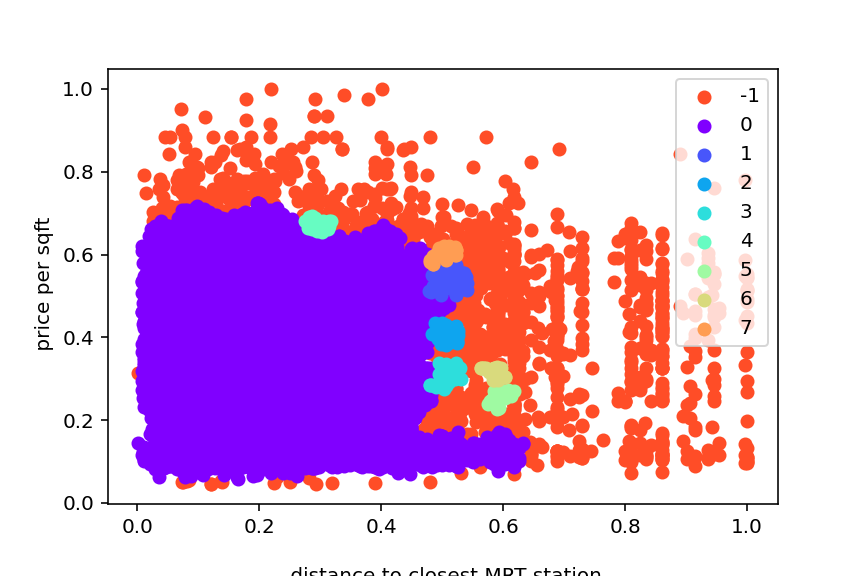

In [92]:
%matplotlib inline
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.use('nbagg')

model = DBSCAN(eps=0.02, min_samples= 20)
dbscan_yhat = model.fit_predict(x_2D)
dbscan_clusters = unique(dbscan_yhat)


print(f'DBSCAN culster numbers: {len(dbscan_clusters)}; cluster: {dbscan_clusters}')


fig = plt.figure()
ax1 = fig.add_subplot()
# ax1 = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(dbscan_clusters)*10))

for cluster in dbscan_clusters:
    row_ix = where(dbscan_yhat == cluster)
    ax1.scatter(x_2D[row_ix, 0], x_2D[row_ix, 1], label = cluster, color=colors[cluster*10])
xLabel = ax1.set_xlabel('\n distance to closest MRT station')
yLabel = ax1.set_ylabel('\n price per sqft')
plt.legend(loc = 1)
plt.show()
plt.savefig('./DBSCAN_2D.png', bbox_inches='tight')

In order to view the balance of each class, we also output the number of points in each cluster in the following cell.
We try different combinations of min_sample and eps. When we use small eps, many points are classified into cluster -1, which means they are noisy data. Therefore, we adjust the eps and min_samples and the clustering still has some imbalance problems. Detailed analysis please refer to the report.

In [27]:
for cluster in dbscan_clusters:
    num_records = where(dbscan_yhat == cluster)[0].shape[0]
    print(f'DBSCAN cluster:{cluster}; Records: {num_records}')
    

DBSCAN cluster:-1; Records: 584
DBSCAN cluster:0; Records: 16949
DBSCAN cluster:1; Records: 116
DBSCAN cluster:2; Records: 26
DBSCAN cluster:3; Records: 120
DBSCAN cluster:4; Records: 57
DBSCAN cluster:5; Records: 31
DBSCAN cluster:6; Records: 125
DBSCAN cluster:7; Records: 73
DBSCAN cluster:8; Records: 20
DBSCAN cluster:9; Records: 26
DBSCAN cluster:10; Records: 27
DBSCAN cluster:11; Records: 19
DBSCAN cluster:12; Records: 15
DBSCAN cluster:13; Records: 7


## Kmeans

The cluster number refers to different classes. Notice, we set cluster number as 6 in Kmeans.

KMeans culster numbers: 9; cluster: [0 1 2 3 4 5 6 7 8]


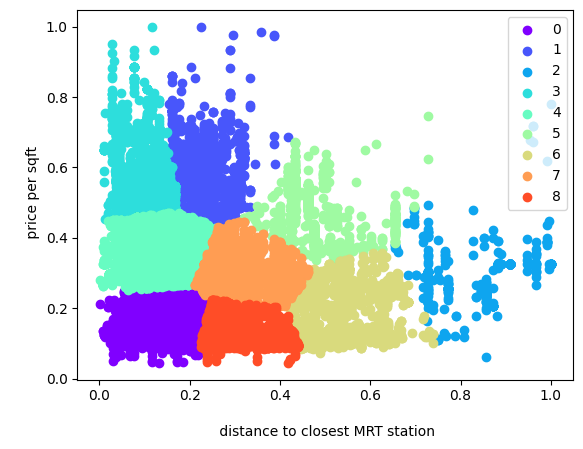

<Figure size 640x480 with 0 Axes>

In [27]:
%matplotlib inline
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.cm as cm
model = KMeans(n_clusters=9)
model.fit(x_2D)

KMeans_yhat = model.fit_predict(x_2D)
KMeans_clusters = unique(KMeans_yhat)


print(f'KMeans culster numbers: {len(KMeans_clusters)}; cluster: {KMeans_clusters}')


fig = plt.figure()
ax1 = fig.add_subplot()

colors = cm.rainbow(np.linspace(0, 1, len(KMeans_clusters)*10))

for cluster in KMeans_clusters:
    row_ix = where(KMeans_yhat == cluster)
    ax1.scatter(x_2D[row_ix, 0], x_2D[row_ix, 1], label = cluster, color=colors[cluster*10])
xLabel = ax1.set_xlabel('\n distance to closest MRT station')
yLabel = ax1.set_ylabel('\n price per sqft')
plt.legend(loc = 1)
plt.show()
plt.savefig('./KMeans_2D.png', bbox_inches='tight')

In [28]:
for cluster in KMeans_clusters:
    num_records = where(KMeans_yhat == cluster)[0].shape[0]
    print(f'KMeans cluster:{cluster}; Records: {num_records}')


KMeans cluster:0; Records: 3054
KMeans cluster:1; Records: 2659
KMeans cluster:2; Records: 389
KMeans cluster:3; Records: 2518
KMeans cluster:4; Records: 3610
KMeans cluster:5; Records: 996
KMeans cluster:6; Records: 1307
KMeans cluster:7; Records: 1685
KMeans cluster:8; Records: 1977


## GaussianMixture

The cluster number refers to different classes. Notice, we set cluster number as 6 in GaussianMixture.

GaussianMixture culster numbers: 9; cluster: [0 1 2 3 4 5 6 7 8]


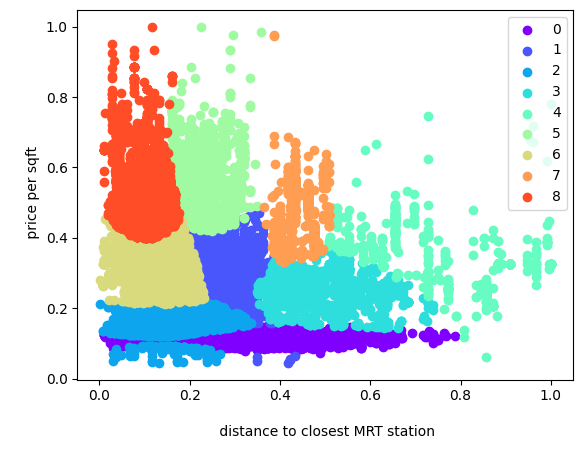

<Figure size 640x480 with 0 Axes>

In [51]:
%matplotlib inline
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

model = GaussianMixture(n_components=9)
model.fit(x_2D)

GaussianMixture_yhat = model.fit_predict(x_2D)
GaussianMixture_clusters = unique(GaussianMixture_yhat)


print(f'GaussianMixture culster numbers: {len(GaussianMixture_clusters)}; cluster: {GaussianMixture_clusters}')


fig = plt.figure()
ax1 = fig.add_subplot()

colors = cm.rainbow(np.linspace(0, 1, len(GaussianMixture_clusters)*10))

for cluster in GaussianMixture_clusters:
    row_ix = where(GaussianMixture_yhat == cluster)
    ax1.scatter(x_2D[row_ix, 0], x_2D[row_ix, 1], label = cluster, color=colors[cluster*10])
xLabel = ax1.set_xlabel('\n distance to closest MRT station')
yLabel = ax1.set_ylabel('\n price per sqft')
plt.legend(loc = 1)
plt.show()
plt.savefig('./GaussianMixture_2D.png', bbox_inches='tight')

In [47]:
for cluster in GaussianMixture_clusters:
    num_records = where(GaussianMixture_yhat == cluster)[0].shape[0]
    print(f'GaussianMixture cluster:{cluster}; Records: {num_records}')

GaussianMixture cluster:0; Records: 2682
GaussianMixture cluster:1; Records: 3239
GaussianMixture cluster:2; Records: 544
GaussianMixture cluster:3; Records: 3123
GaussianMixture cluster:4; Records: 3143
GaussianMixture cluster:5; Records: 1600
GaussianMixture cluster:6; Records: 875
GaussianMixture cluster:7; Records: 1818
GaussianMixture cluster:8; Records: 1171


# Clustering Model in 3D data

In this section, we try DBSCAN, Kmeans and GuassionMixture models to clustering data points in 3D. We select attributes: size_sqft, total_num_units, price.

## Normalize data


In [32]:
x_3D = data[[ 'size_sqft', 'total_num_units', 'price']]
x_3D['size_sqft'] = x_3D['size_sqft'] /x_3D['size_sqft'].abs().max()
x_3D['total_num_units'] = x_3D['total_num_units'] /x_3D['total_num_units'].abs().max()
x_3D['price'] = x_3D['price'] /x_3D['price'].abs().max()
x_3D = x_3D.to_numpy()

## DBSCAN

In this section, we try DBSCAN to cluster each houses based on size sqft, total num units and price. During testing the suitable parameter, such as eps and min_sampels, we get some interesting results.

The houses whose build year is later than 2022 will be classified into new cluster rather than be with built house.

DBSCAN culster numbers: 7; cluster: [-1  0  1  2  3  4  5]


<IPython.core.display.Javascript object>


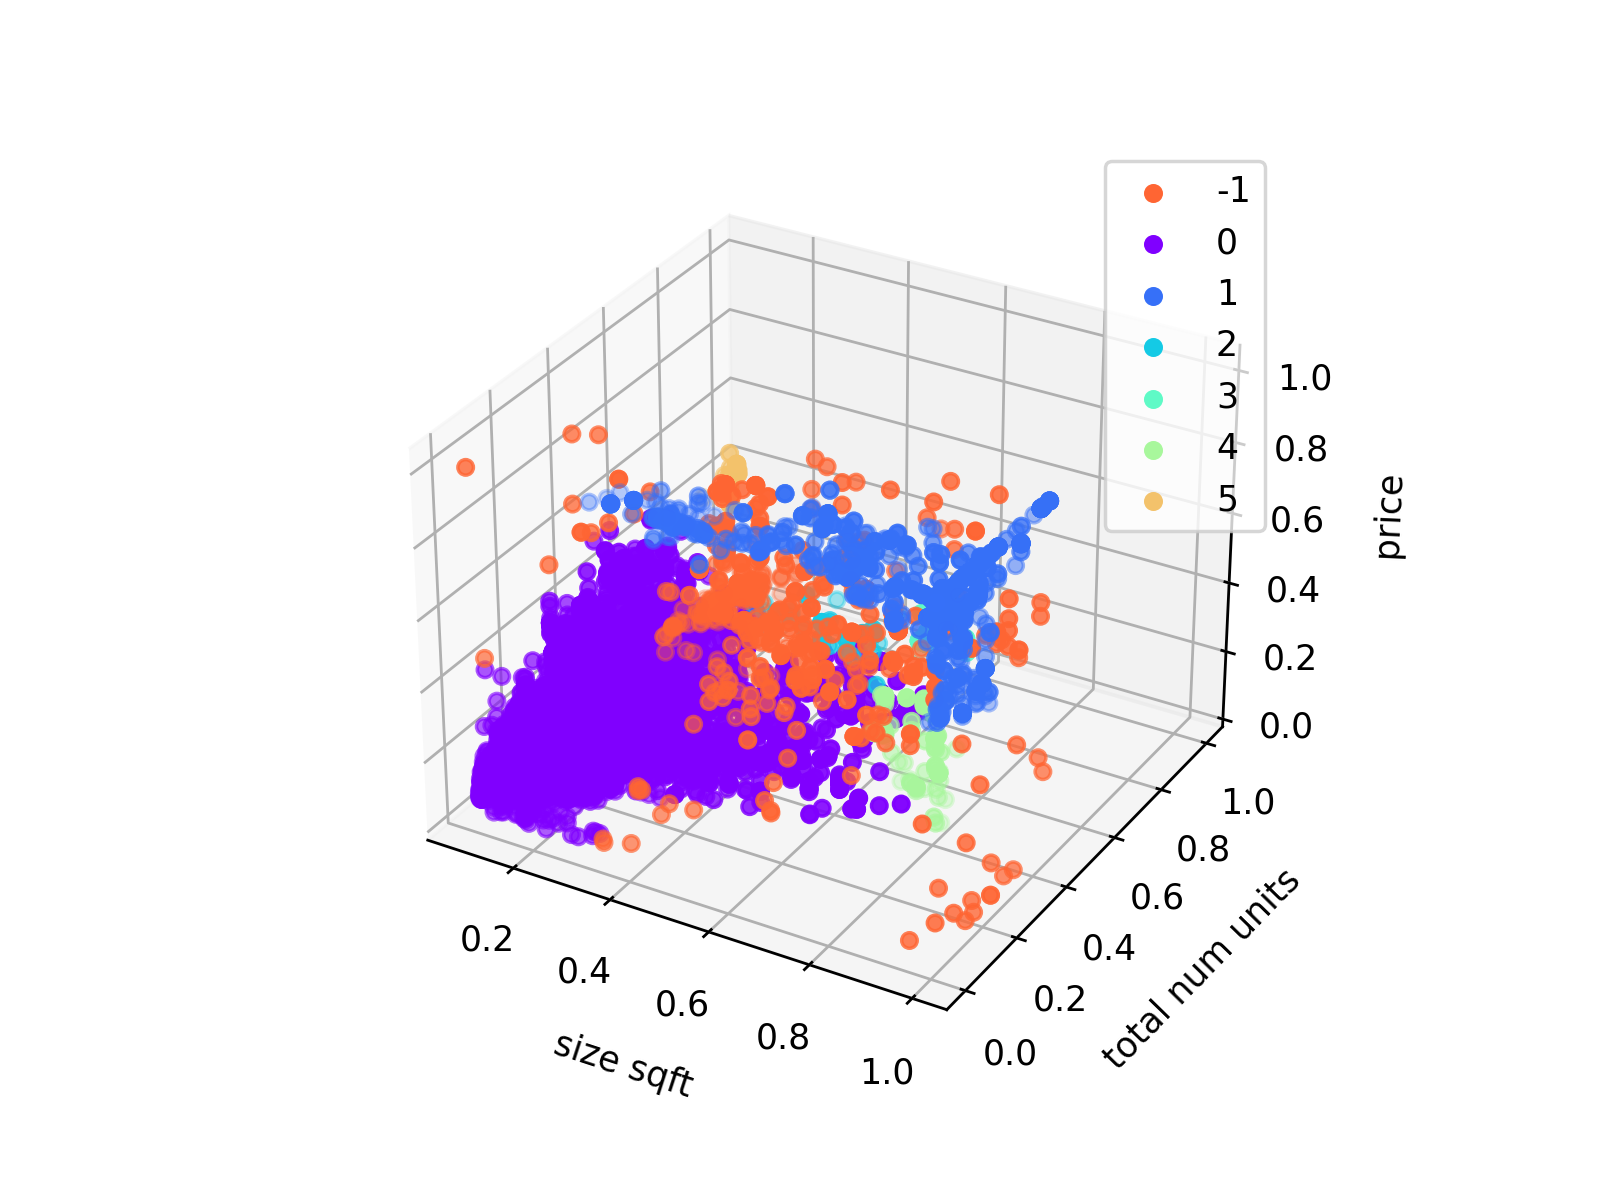

In [33]:
%matplotlib inline
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
matplotlib.use('nbagg')

model = DBSCAN(eps=0.08, min_samples=35)
dbscan_yhat = model.fit_predict(x_3D)

dbscan_clusters = unique(dbscan_yhat)


print(f'DBSCAN culster numbers: {len(dbscan_clusters)}; cluster: {dbscan_clusters}')


fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(dbscan_clusters)*10))

for cluster in dbscan_clusters:
    row_ix = where(dbscan_yhat == cluster)
    ax1.scatter(x_3D[row_ix, 0], x_3D[row_ix, 1], x_3D[row_ix, 2], marker='o', label = cluster, color=colors[cluster*10])
xLabel = ax1.set_xlabel('\n size sqft')
yLabel = ax1.set_ylabel('\n total num units')
zLabel = ax1.set_zlabel('\n price')
plt.legend()
plt.show()
plt.savefig('./DBSCAN_3D.png', bbox_inches='tight')


In [93]:
for cluster in dbscan_clusters:
    num_records = where(dbscan_yhat == cluster)[0].shape[0]
    print(f'DBSCAN cluster:{cluster}; Records: {num_records}')
    

DBSCAN cluster:-1; Records: 1255
DBSCAN cluster:0; Records: 16625
DBSCAN cluster:1; Records: 65
DBSCAN cluster:2; Records: 37
DBSCAN cluster:3; Records: 45
DBSCAN cluster:4; Records: 26
DBSCAN cluster:5; Records: 32
DBSCAN cluster:6; Records: 26
DBSCAN cluster:7; Records: 26


In [35]:
num_records = where(dbscan_yhat == 3)[0]
num_records
data.iloc[num_records]

listing_id                                     title  \
63         797442        5 bed house for sale in toh estate   
1516       310051        6 bed house for sale in toh estate   
1694       320284        6 bed house for sale in toh estate   
1854       161632        5 bed house for sale in toh estate   
3700       875874        5 bed house for sale in toh estate   
3909       828653        5 bed house for sale in toh estate   
4926       127352        5 bed house for sale in toh estate   
4954       329703  5 bed house for sale in chwee chian view   
5003       455421        5 bed house for sale in toh estate   
5566       268908        4 bed house for sale in toh estate   
5765       371472        5 bed house for sale in toh estate   
5766       777452        6 bed house for sale in toh estate   
6018       987255        6 bed house for sale in toh estate   
6500       813877        5 bed house for sale in toh estate   
6633       739040        5 bed house for sale in toh estate   
6677       709769        5 bed house for sale in toh estate   
8299       931609        5 bed house for sale in toh estate   
8339       637991        5 bed house for sale in toh estate   
8456       675124  5 bed house for sale in chwee chian view   
8693       879612        5 bed house for sale in toh estate   
9130       399915        6 bed house for sale in toh estate   
9233       276559        5 bed house for sale in toh estate   
9715       575735        6 bed house for sale in toh estate   
10306      797503        5 bed house for sale in toh estate   
10434      366753        5 bed house for sale in toh estate   
10596      508216        5 bed house for sale in toh estate   
10974      231839        6 bed house for sale in toh estate   
11234      959887      6 bed house for sale in ponggol park   
11813      338572        5 bed house for sale in toh estate   
12368      473935        5 bed house for sale in toh estate   
12408      275565      6 bed house for sale in ponggol park   
12422      639423        5 bed house for sale in toh estate   
13548      826019        6 bed house for sale in toh estate   
13864      886237        5 bed house for sale in toh estate   
14461      563440        5 bed house for sale in toh estate   
14548      184701        6 bed house for sale in toh estate   
14833      512684        6 bed house for sale in toh estate   
15294      278150        5 bed house for sale in toh estate   
15908      236310  5 bed house for sale in chwee chian view   
15918      988005        5 bed house for sale in toh estate   
16177      194544        5 bed house for sale in toh estate   
16796      297489        5 bed house for sale in toh estate   
17491      199318        5 bed house for sale in toh estate   
18031      797347        5 bed house for sale in toh estate   
18098      951794        5 bed house for sale in toh estate   

                            address     property_name        property_type  \
63                       toh avenue        toh estate  semi-detached house   
1516                   toh crescent        toh estate  semi-detached house   
1694                      toh drive        toh estate  semi-detached house   
1854                   toh crescent        toh estate  semi-detached house   
3700                   toh crescent        toh estate  semi-detached house   
3909                     toh avenue        toh estate  semi-detached house   
4926                     toh avenue        toh estate  semi-detached house   
4954               chwee chian view  chwee chian view             bungalow   
5003                     toh avenue        toh estate  semi-detached house   
5566                   toh crescent        toh estate             bungalow   
5765                     toh avenue        toh estate  semi-detached house   
5766                     toh avenue        toh estate  semi-detached house   
6018              old tampines road        toh estate  semi-detached house   
6500            

KMeans culster numbers: 9; cluster: [0 1 2 3 4 5 6 7 8]


<IPython.core.display.Javascript object>


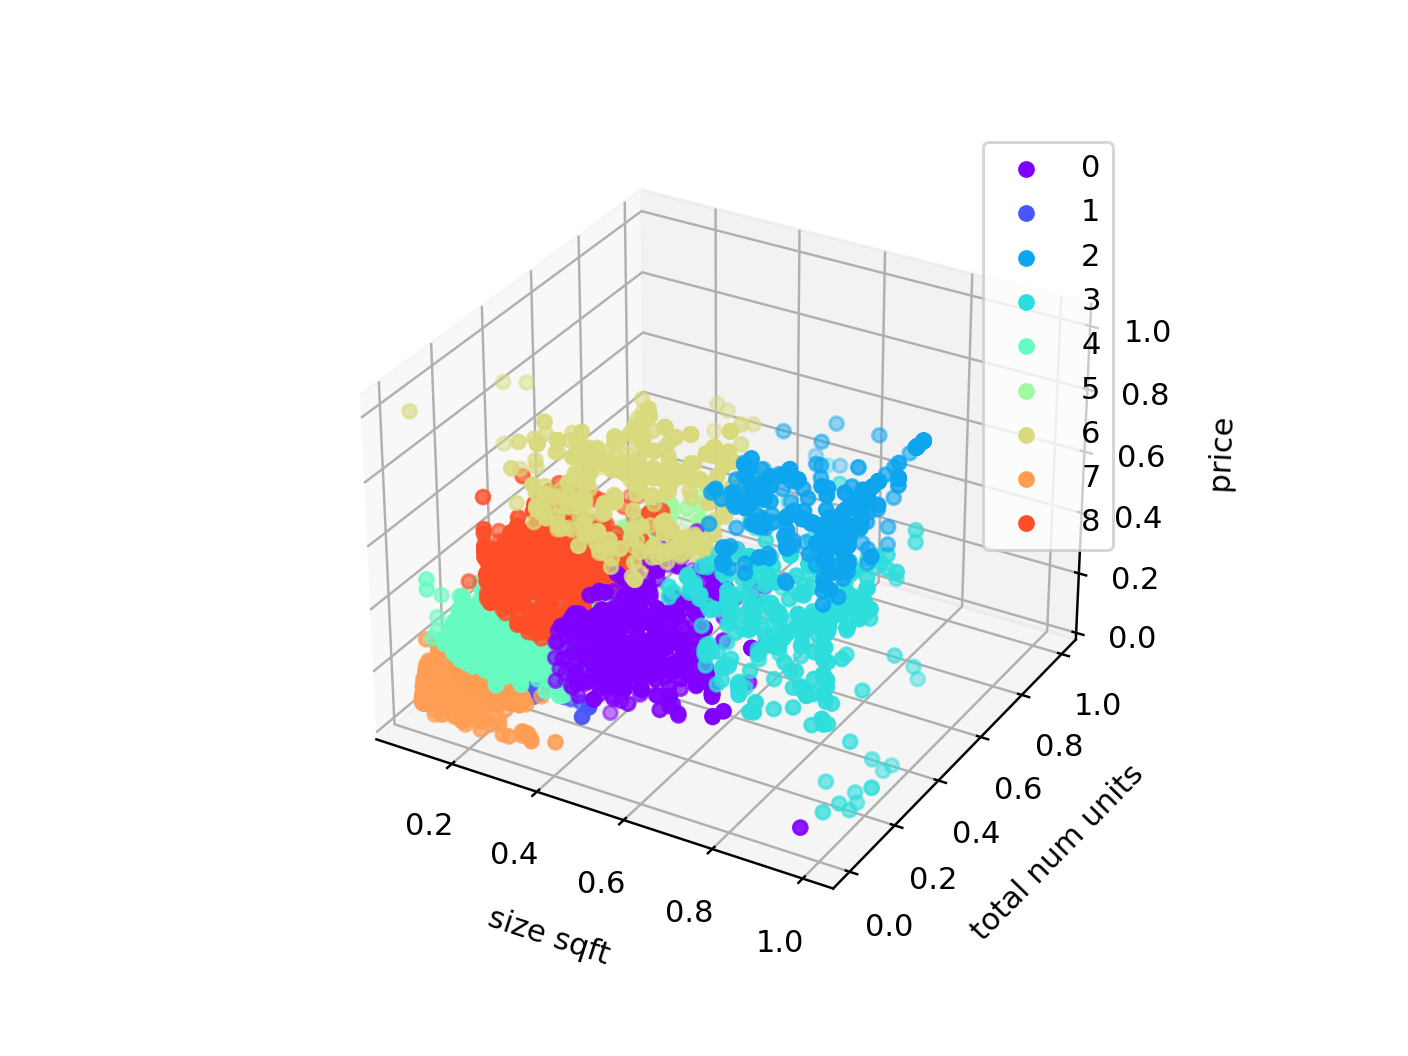

In [42]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

model = KMeans(n_clusters=9)
model.fit(x_3D)
KMeans_yhat = model.predict(x_3D)
KMeans_clusters = unique(KMeans_yhat)

print(f'KMeans culster numbers: {len(KMeans_clusters)}; cluster: {KMeans_clusters}')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(KMeans_clusters)*10))
for cluster in range(len(KMeans_clusters)):
    row_ix = where(KMeans_yhat == cluster)
    ax1.scatter(x_3D[row_ix, 0], x_3D[row_ix, 1], x_3D[row_ix, 2], marker='o', label = cluster, color=colors[cluster*10])

xLabel = ax1.set_xlabel('\n size sqft')
yLabel = ax1.set_ylabel('\n total num units')
zLabel = ax1.set_zlabel('\n price')
plt.legend()
plt.show()
plt.savefig('./KMeans_3D.png', bbox_inches='tight')

In [39]:
for cluster in KMeans_clusters:
    num_records = where(KMeans_yhat == cluster)[0].shape[0]
    print(f'KMeans cluster:{cluster}; Records: {num_records}')
    

KMeans cluster:0; Records: 6270
KMeans cluster:1; Records: 1123
KMeans cluster:2; Records: 3052
KMeans cluster:3; Records: 593
KMeans cluster:4; Records: 545
KMeans cluster:5; Records: 4372
KMeans cluster:6; Records: 963
KMeans cluster:7; Records: 907
KMeans cluster:8; Records: 503


GaussianMixture culster numbers: 9; cluster: [0 1 2 3 4 5 6 7 8]


<IPython.core.display.Javascript object>


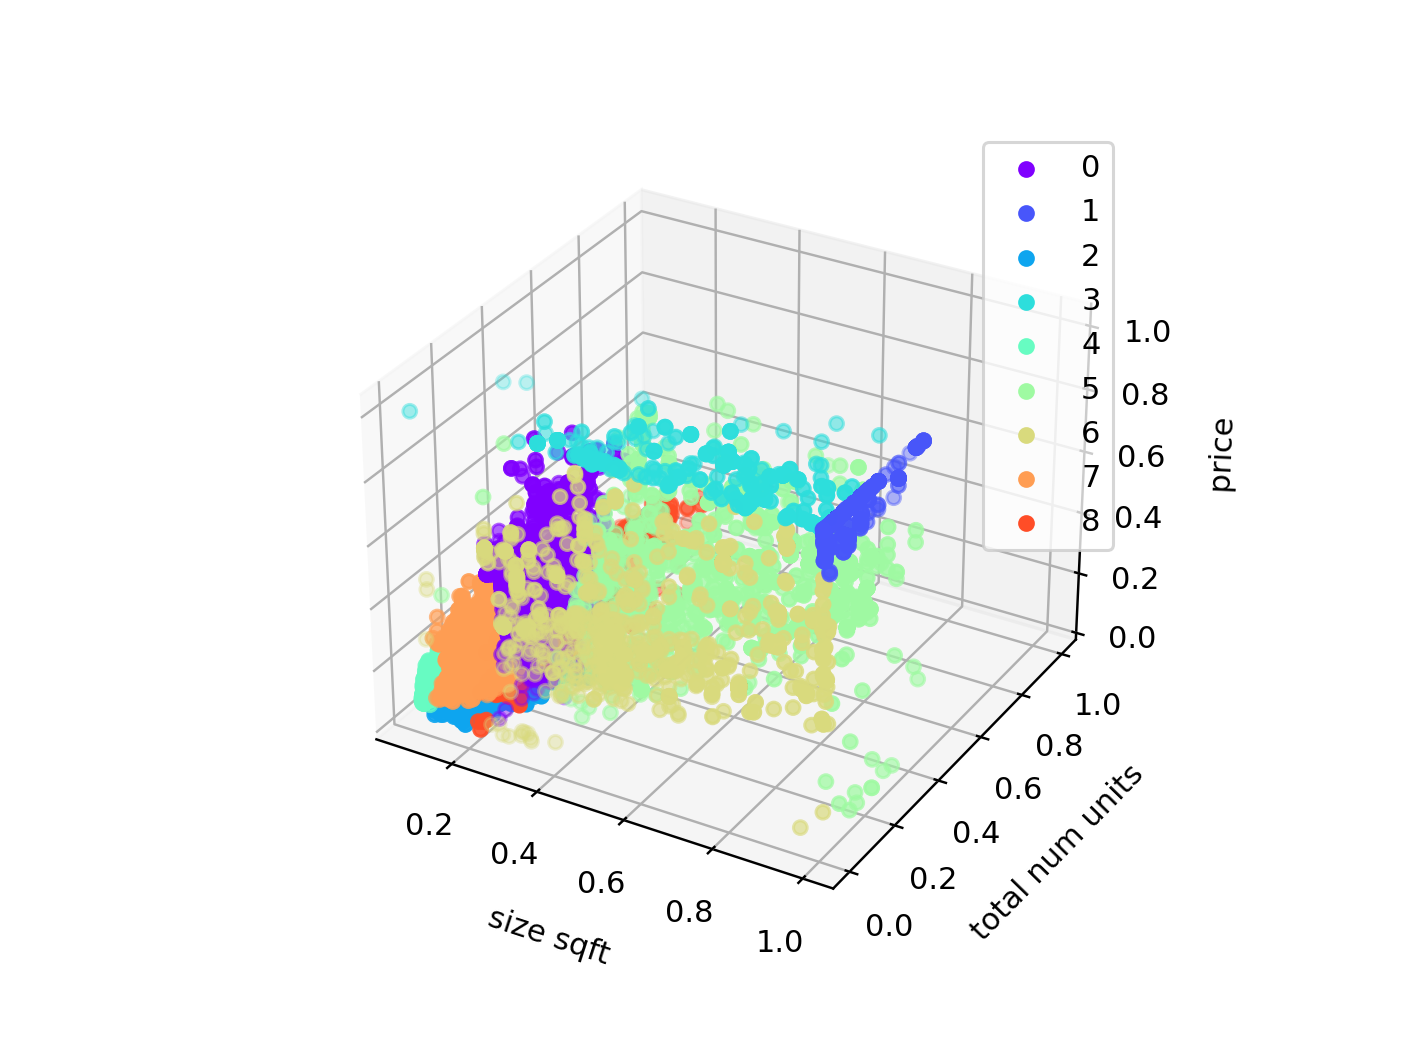

In [43]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

model = GaussianMixture(n_components=9)
model.fit(x_3D)
GaussianMixture_yhat = model.predict(x_3D)
GaussianMixture_clusters = unique(GaussianMixture_yhat)
print(f'GaussianMixture culster numbers: {len(GaussianMixture_clusters)}; cluster: {GaussianMixture_clusters}')

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

colors = cm.rainbow(np.linspace(0, 1, len(GaussianMixture_clusters)*10))
for cluster in range(len(GaussianMixture_clusters)):
    row_ix = where(GaussianMixture_yhat == cluster)
    ax1.scatter(x_3D[row_ix, 0], x_3D[row_ix, 1], x_3D[row_ix, 2], marker='o', label = cluster, color=colors[cluster*10])

xLabel = ax1.set_xlabel('\n size sqft')
yLabel = ax1.set_ylabel('\n total num units')
zLabel = ax1.set_zlabel('\n price')
plt.legend()
plt.show()
plt.savefig('./GaussianMixture_3D.png', bbox_inches='tight')

In [41]:
for cluster in GaussianMixture_clusters:
    num_records = where(GaussianMixture_yhat == cluster)[0].shape[0]
    print(f'GaussianMixture cluster:{cluster}; Records: {num_records}')

GaussianMixture cluster:0; Records: 3368
GaussianMixture cluster:1; Records: 791
GaussianMixture cluster:2; Records: 980
GaussianMixture cluster:3; Records: 870
GaussianMixture cluster:4; Records: 4158
GaussianMixture cluster:5; Records: 1212
GaussianMixture cluster:6; Records: 325
GaussianMixture cluster:7; Records: 5340
GaussianMixture cluster:8; Records: 1284
